## NLP Challenge

## Problem Statement:

1. Pre process the data using regex and NLP libraries. Implement Ngrams

2. Use different word embeddings to represent words

3. Train your own word embeddings 

4. Plot those embeddings and see if there are any clusters formed. Use different clustering methods and justify the output.

5. Train a sequence to sequence model to built a language model on the dataset

6. Use different embeddings in your models to see various outputs.

In [27]:
file = open('War_And_Peace.txt','r')
warAndPeace=file.read()

In [28]:
book=warAndPeace.split('BOOK ONE: 1805\n\n\n\n\n\n')
chapters=book[1].split('CHAPTER')
sampleChapter=chapters[1]

In [29]:
sampleChapter=sampleChapter.replace('\n\n',' ')
sampleChapter

' I “Well, Prince, so Genoa and Lucca are now just family estates of the\nBuonapartes. But I warn you, if you don’t tell me that this means war,\nif you still try to defend the infamies and horrors perpetrated by that\nAntichrist—I really believe he is Antichrist—I will have nothing\nmore to do with you and you are no longer my friend, no longer my\n‘faithful slave,’ as you call yourself! But how do you do? I see I\nhave frightened you—sit down and tell me all the news.” It was in July, 1805, and the speaker was the well-known Anna Pávlovna\nSchérer, maid of honor and favorite of the Empress Márya Fëdorovna.\nWith these words she greeted Prince Vasíli Kurágin, a man of high\nrank and importance, who was the first to arrive at her reception. Anna\nPávlovna had had a cough for some days. She was, as she said, suffering\nfrom la grippe; grippe being then a new word in St. Petersburg, used\nonly by the elite. All her invitations without exception, written in French, and delivered\nby a sca

In [30]:
import spacy
nlp=spacy.load('en')
parsed_sampleChapter=nlp(sampleChapter)

### Preprocessing of text

In [31]:
texts,article=[],[]
for word in parsed_sampleChapter:
    if word.text!='\n' and not word.is_punct and not word.like_num and word.text!='-PRON-':
        if word.lemma_!='-PRON-':
            article.append(word.lemma_)
    if word.text=='\n':
        texts.append(article)
        article=[]

In [32]:
texts

[[' ',
  'well',
  'prince',
  'so',
  'genoa',
  'and',
  'lucca',
  'be',
  'now',
  'just',
  'family',
  'estate',
  'of',
  'the'],
 ['buonapartes',
  'but',
  'warn',
  'if',
  'do',
  'not',
  'tell',
  'that',
  'this',
  'mean',
  'war'],
 ['if',
  'still',
  'try',
  'to',
  'defend',
  'the',
  'infamy',
  'and',
  'horror',
  'perpetrate',
  'by',
  'that'],
 ['antichrist',
  'really',
  'believe',
  'be',
  'antichrist',
  'will',
  'have',
  'nothing'],
 ['more',
  'to',
  'do',
  'with',
  'and',
  'be',
  'no',
  'longer',
  'friend',
  'no',
  'longer'],
 ['faithful', 'slave,’', 'as', 'call', 'but', 'how', 'do', 'do', 'see'],
 ['have',
  'frighten',
  'sit',
  'down',
  'and',
  'tell',
  'all',
  'the',
  'news',
  'be',
  'in',
  'july',
  'and',
  'the',
  'speaker',
  'be',
  'the',
  'well',
  'know',
  'anna',
  'pávlovna'],
 ['schérer',
  'maid',
  'of',
  'honor',
  'and',
  'favorite',
  'of',
  'the',
  'empress',
  'márya',
  'fëdorovna'],
 ['with',
  'these

### Bigrams / NGrams

In [33]:
import gensim
from gensim.models.phrases import Phrases, Phraser

In [34]:
bigram = gensim.models.Phrases(texts)
bigram_texts = [bigram[line] for line in texts]
bigram_texts

/opt/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[[' ',
  'well',
  'prince',
  'so',
  'genoa',
  'and',
  'lucca',
  'be',
  'now',
  'just',
  'family',
  'estate',
  'of',
  'the'],
 ['buonapartes',
  'but',
  'warn',
  'if',
  'do_not',
  'tell',
  'that',
  'this',
  'mean',
  'war'],
 ['if',
  'still',
  'try',
  'to',
  'defend',
  'the',
  'infamy',
  'and',
  'horror',
  'perpetrate',
  'by',
  'that'],
 ['antichrist',
  'really',
  'believe',
  'be',
  'antichrist',
  'will',
  'have',
  'nothing'],
 ['more',
  'to',
  'do',
  'with',
  'and',
  'be',
  'no',
  'longer',
  'friend',
  'no',
  'longer'],
 ['faithful', 'slave,’', 'as', 'call', 'but', 'how', 'do', 'do', 'see'],
 ['have',
  'frighten',
  'sit',
  'down',
  'and',
  'tell',
  'all',
  'the',
  'news',
  'be',
  'in',
  'july',
  'and',
  'the',
  'speaker',
  'be',
  'the',
  'well',
  'know',
  'anna_pávlovna'],
 ['schérer',
  'maid',
  'of',
  'honor',
  'and',
  'favorite',
  'of',
  'the',
  'empress',
  'márya',
  'fëdorovna'],
 ['with',
  'these',
  'word

In [35]:
bigram[[u'anna', u'pávlovna',u'do',u'not',u'another',u'direction']]

/opt/anaconda3/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['anna_pávlovna', 'do_not', 'another', 'direction']

### Word Embedding

In [36]:
from gensim.models import Word2Vec 
model1 = gensim.models.Word2Vec(texts, min_count = 1,size = 100, window = 5)
print('anna & pávlovna - ',model1.similarity('anna', 'pávlovna'))
print('emperor & king - ',model1.similarity('emperor', 'king'))
print('rich & emperor - ',model1.similarity('rich', 'emperor'))
print('rich & king - ',model1.similarity('rich', 'king'))
print('father & king - ',model1.similarity('father', 'king'))
print('father & poor - ',model1.similarity('father', 'poor'))
print('prince & son - ',model1.similarity('prince', 'son'))

anna & pávlovna -  -0.07715630889861973
emperor & king -  0.038198097268036614
rich & emperor -  -0.006119654485536773
rich & king -  0.11279803305159913
father & king -  0.08327282372611032
father & poor -  0.07843876995578156
prince & son -  -0.08683582450917472


/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `simil

### Plotting word embeddings

In [37]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [38]:
model = word2vec.Word2Vec(texts,min_count=2,window=10)

In [39]:
model.most_similar('motive')

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('for', 0.2663142681121826),
 ('empress', 0.2531488537788391),
 ('noble', 0.250978946685791),
 ('as', 0.24506422877311707),
 ('last', 0.24450168013572693),
 ('rich', 0.22721678018569946),
 ('indicate', 0.22417789697647095),
 ('give', 0.2075839638710022),
 ('evening', 0.19564202427864075),
 ('prince', 0.19110232591629028)]

In [40]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


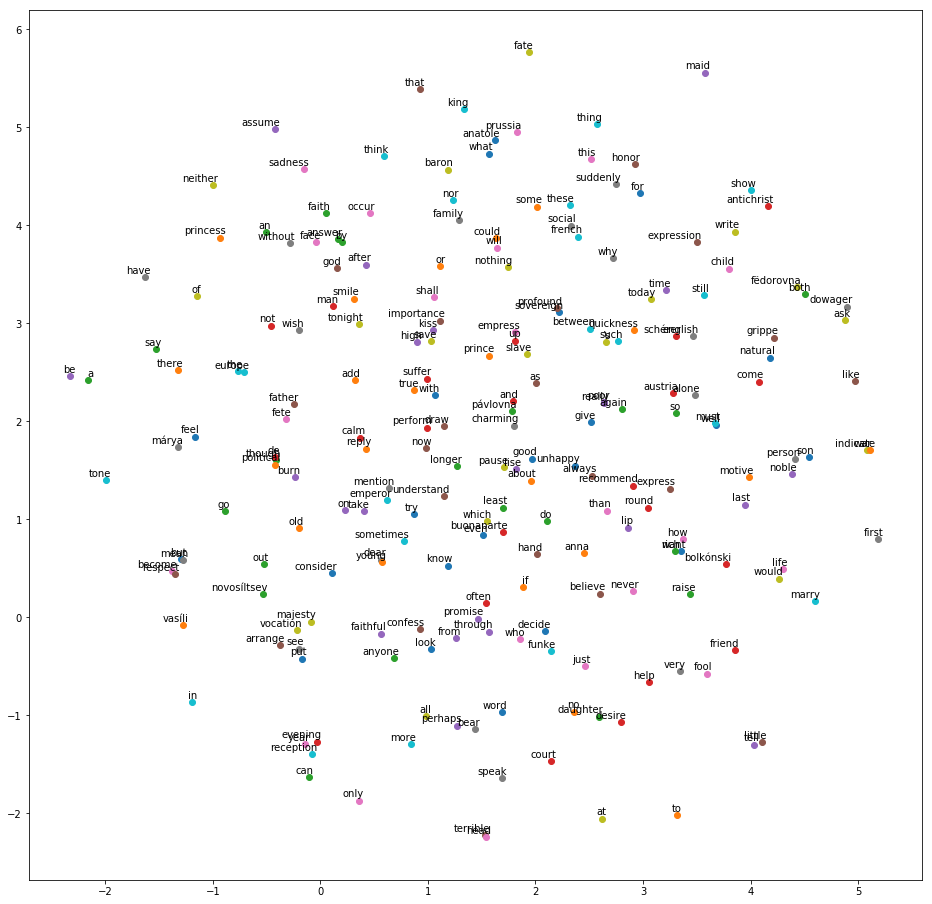

In [41]:
tsne_plot(model)

### Clustering of Words

In [45]:
X = model[model.wv.vocab]

from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
# output: [0, 2, 1, 2, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 2]

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 0, 2, 1, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1]


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

x = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf['cluster']=assigned_clusters


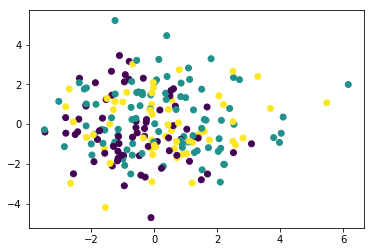

In [67]:
plt.scatter(principalDf.pc1,principalDf.pc2,c=principalDf.cluster)


### Sequence to Sequence Modeling

In [75]:
import numpy as np

text=sampleChapter

maxlen=60
step=6
sentences=[]
next_chars=[]
for i in range(0,len(text)-maxlen,step):
    sentences.append(text[i:i+maxlen])
    next_chars.append(text[i+maxlen])
print('Number of sequences : ',len(sentences))

chars=sorted(list(set(text)))
print('Unique characters: ',len(chars))

char_indices=dict((char,chars.index(char)) for char in chars)

print("Vectorization")
x=np.zeros((len(sentences),maxlen,len(chars)),dtype=np.bool)
y=np.zeros((len(sentences),len(chars)),dtype=np.bool)

for i,sentence in enumerate(sentences):
    for t,char in enumerate(sentence):
        x[i,t,char_indices[char]]=1
    y[i,char_indices[next_chars[i]]]=1


    
import keras
from keras import layers

model=keras.models.Sequential()
model.add(layers.LSTM(128,input_shape=(maxlen,len(chars))))
model.add(layers.Dense(len(chars),activation='softmax'))
optimizer=keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy',optimizer=optimizer)
model.fit(x,y,batch_size=128,epochs=30)



def sample(preds,temperature=1.0):
    preds=np.asarray(preds).astype('float64')
    preds=np.log(preds)/temperature
    exp_preds=np.exp(preds)
    preds=exp_preds/np.sum(exp_preds)
    probas=np.random.multinomial(1,preds,1)
    return np.argmax(probas)

import random
import sys

print("Generate Text Using RNN from sample chapter")
start_index=random.randint(0,len(text)-maxlen-1)
generated_text=text[start_index:start_index+maxlen]
print('---Generating with seed : "'+ generated_text +' "')    
for temperature in [0.2,0.5,1.0,1.2]:
    print('\n\n---randomness :',temperature)
    sys.stdout.write(generated_text)    
    for i in range(80):
        sampled=np.zeros((1,maxlen,len(chars)))
        for t,char in enumerate(generated_text):
            sampled[0,t,char_indices[char]]=1

        preds=model.predict(sampled,verbose=0)[0]
        next_index=sample(preds,temperature)
        next_char=chars[next_index]

        generated_text+=next_char
        generated_text=generated_text[1:]
        sys.stdout.write(next_char)


Number of sequences :  1891
Unique characters:  76
Vectorization
Epoch 1/30


InternalError: Failed to create session.

## Other Embedding Models 